In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df1 = pd.read_csv("/content/drive/MyDrive/AI_Final_Project/CECS551_dataset_01/train.csv")
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/AI_Final_Project/CECS551_dataset_01/stores.csv")
df2.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df = pd.merge(df1, df2, on="Store")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [ ]:
df = df.drop(['Date'], axis=1)
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,1,24924.50,False,A,151315
1,1,1,46039.49,True,A,151315
2,1,1,41595.55,False,A,151315
3,1,1,19403.54,False,A,151315
4,1,1,21827.90,False,A,151315


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Type'])
df['Type'] = label
label = le.fit_transform(df['IsHoliday'])
df['IsHoliday'] = label
df.head()


,Store,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,1,24924.50,0,0,151315
1,1,1,46039.49,1,0,151315
2,1,1,41595.55,0,0,151315
3,1,1,19403.54,0,0,151315
4,1,1,21827.90,0,0,151315


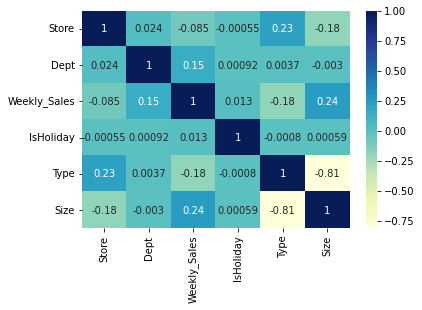

In [ ]:
import seaborn as sb
import matplotlib.pyplot as mp
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
mp.show()

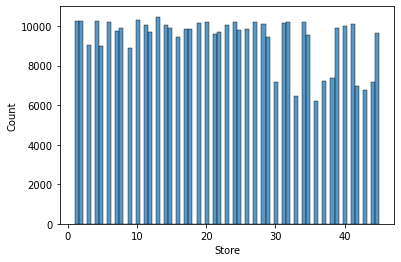

In [ ]:
import seaborn as sns
sns.histplot(data=df,x='Store')

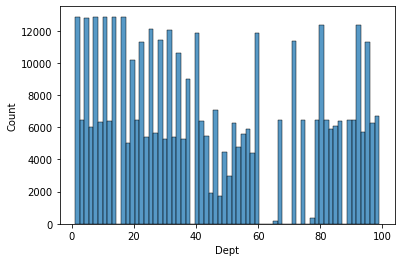

In [ ]:
sns.histplot(data=df,x='Dept')

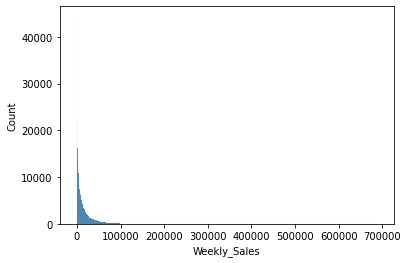

In [ ]:
sns.histplot(data=df,x='Weekly_Sales')

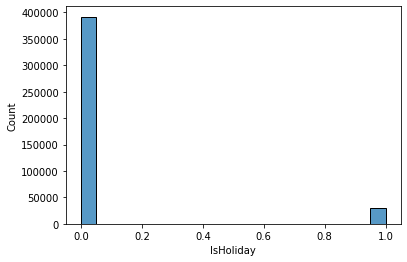

In [ ]:
sns.histplot(data=df,x='IsHoliday')

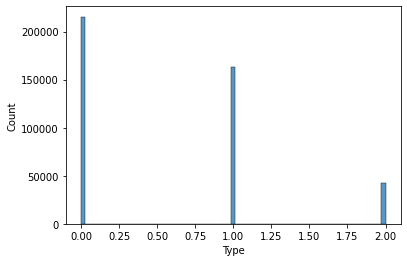

In [ ]:
sns.histplot(data=df,x='Type')

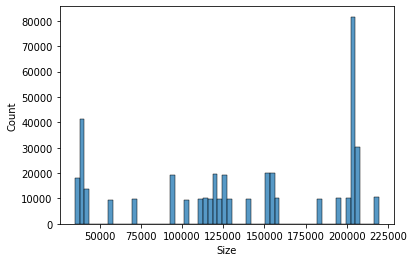

In [ ]:
sns.histplot(data=df,x='Size')

# ***Feature Importance with SHAP***

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import shap
y= np.asarray(df['Weekly_Sales'])

In [ ]:
df= df.drop(['Weekly_Sales'],axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(df.values, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
explainer = shap.TreeExplainer(regr)  
shap_values = explainer.shap_values(df.values)


def shap_feature_ranking(data, shap_values, columns=[]):
    if not columns: columns = data.columns.tolist()     # If columns are not given, take all columns
    
    c_idxs = []
    for column in columns: c_idxs.append(data.columns.get_loc(column))  # Get column locations for desired columns in given dataframe
    if isinstance(shap_values, list):   # If shap values is a list of arrays (i.e., several classes)
        means = [np.abs(shap_values[class_][:, c_idxs]).mean(axis=0) for class_ in range(len(shap_values))]  # Compute mean shap values per class 
        shap_means = np.sum(np.column_stack(means), 1)  # Sum of shap values over all classes 
    else:                               # Else there is only one 2D array of shap values
        assert len(shap_values.shape) == 2, 'Expected two-dimensional shap values array.'
        shap_means = np.abs(shap_values).mean(axis=0)
    
    # Put into dataframe along with columns and sort by shap_means, reset index to get ranking
    df_ranking = pd.DataFrame({'feature': columns, 'mean_shap_value': shap_means}).sort_values(by='mean_shap_value', ascending=False).reset_index(drop=True)
    df_ranking.index += 1
    return df_ranking

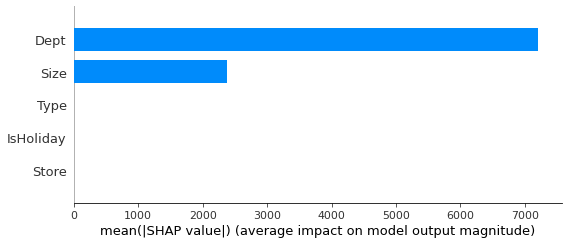

In [ ]:
shap.summary_plot(shap_values, df, plot_type="bar")

Here we create a dataset that has, Store dept date sales is holiday type size data 

In [ ]:
df = pd.merge(df1, df2, on="Store")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


Then in df3 we select the dataset of stores 1 to 10

In [ ]:
df3 = df[df.Store <= 10]
df3 = df3.drop(['Store','Size','Type','IsHoliday',], axis=1)
df3.head()

,Dept,Date,Weekly_Sales
0,1,2010-02-05,24924.50
1,1,2010-02-12,46039.49
2,1,2010-02-19,41595.55
3,1,2010-02-26,19403.54
4,1,2010-03-05,21827.90


Then we sort the data in descending order of weekly sales

In [ ]:
df3 = df3.sort_values(by=['Weekly_Sales'], ascending=False)
df3

,Dept,Date,Weekly_Sales
95373,72,2010-11-26,693099.36
95425,72,2011-11-25,630999.19
88428,7,2010-12-24,406988.63
95377,72,2010-12-24,404245.03
37253,72,2011-11-25,385051.04
...,...,...,...
35561,47,2010-09-17,-898.00
24830,32,2011-09-30,-1008.96
16297,47,2010-11-19,-1098.00
16291,47,2010-07-30,-1098.00


After sorting them we take the upper 35% of the weekly sales and store it in d3

In [ ]:
#Best 35%
df3 = df3[0:int(df3.shape[0]*(35/100))]
df3

,Dept,Date,Weekly_Sales
95373,72,2010-11-26,693099.36
95425,72,2011-11-25,630999.19
88428,7,2010-12-24,406988.63
95377,72,2010-12-24,404245.03
37253,72,2011-11-25,385051.04
...,...,...,...
14562,32,2011-03-18,13465.12
71693,22,2011-12-23,13464.67
14926,34,2012-09-14,13463.60
90991,26,2011-07-01,13463.54


in df4 we club together the same dept weekly sales values to sum them up departmant wise

In [ ]:
df4 = df3.groupby('Dept')['Weekly_Sales'].sum()
df4


Dept
1     2.426254e+07
2     6.684254e+07
3     1.125792e+07
4     3.880453e+07
5     3.466676e+07
          ...     
94    3.839587e+07
95    1.047494e+08
96    1.897973e+07
97    2.184555e+07
98    3.043387e+06
Name: Weekly_Sales, Length: 62, dtype: float64

In [ ]:
df4 = pd.DataFrame(df4, columns=["Weekly_Sales"])
#here we rename the column

In [ ]:
df4

,Weekly_Sales
Dept,
1,2.426254e+07
2,6.684254e+07
3,1.125792e+07
4,3.880453e+07
5,3.466676e+07
...,...
94,3.839587e+07
95,1.047494e+08
96,1.897973e+07


Them we plot the department vs weekly sales plot

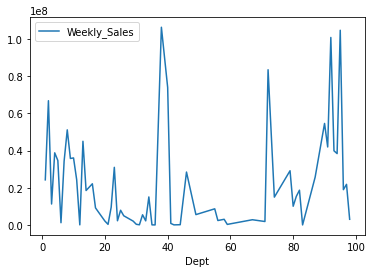

In [ ]:
df4.plot(y='Weekly_Sales', use_index=True)

We wish to calculate the monthly sales so we repeat the previous steps with slight modification

In [ ]:
df5 = df[df.Store <= 10]
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
97834,10,98,2012-09-28,22.34,False,B,126512
97835,10,98,2012-10-05,789.38,False,B,126512
97836,10,98,2012-10-12,477.24,False,B,126512
97837,10,98,2012-10-19,578.46,False,B,126512


Here we try to remove our date information and select only years and months

In [ ]:
df5['Date'] = df5['Date'].str[:7]
df5


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02,24924.50,False,A,151315
1,1,1,2010-02,46039.49,True,A,151315
2,1,1,2010-02,41595.55,False,A,151315
3,1,1,2010-02,19403.54,False,A,151315
4,1,1,2010-03,21827.90,False,A,151315
...,...,...,...,...,...,...,...
97834,10,98,2012-09,22.34,False,B,126512
97835,10,98,2012-10,789.38,False,B,126512
97836,10,98,2012-10,477.24,False,B,126512
97837,10,98,2012-10,578.46,False,B,126512


Here we drop the unnesasary columns

In [ ]:
df5 = df5.drop(['Store','Size','Type','IsHoliday'], axis=1)
df5

,Dept,Date,Weekly_Sales
0,1,2010-02,24924.50
1,1,2010-02,46039.49
2,1,2010-02,41595.55
3,1,2010-02,19403.54
4,1,2010-03,21827.90
...,...,...,...
97834,98,2012-09,22.34
97835,98,2012-10,789.38
97836,98,2012-10,477.24
97837,98,2012-10,578.46


Here we create a new data which includes both the dept and date

In [ ]:
df5["Dept-Date"] = df5['Dept'].astype(str) +"-"+ df5["Date"]
print(df5)

       Dept     Date  Weekly_Sales   Dept-Date
0         1  2010-02      24924.50   1-2010-02
1         1  2010-02      46039.49   1-2010-02
2         1  2010-02      41595.55   1-2010-02
3         1  2010-02      19403.54   1-2010-02
4         1  2010-03      21827.90   1-2010-03
...     ...      ...           ...         ...
97834    98  2012-09         22.34  98-2012-09
97835    98  2012-10        789.38  98-2012-10
97836    98  2012-10        477.24  98-2012-10
97837    98  2012-10        578.46  98-2012-10
97838    98  2012-10        560.02  98-2012-10

[97839 rows x 4 columns]


Now we use the new dept date data to club together our weekly sales into monthly sales

In [ ]:
df6 = df5.groupby('Dept-Date')['Weekly_Sales'].sum()
df6


Dept-Date
1-2010-02     1080517.64
1-2010-03      793930.01
1-2010-04     1352255.81
1-2010-05      626823.83
1-2010-06      617884.56
                 ...    
99-2012-06       2050.00
99-2012-07         50.88
99-2012-08       1831.42
99-2012-09         50.47
99-2012-10       3135.06
Name: Weekly_Sales, Length: 2520, dtype: float64

In [ ]:
df6 = pd.DataFrame(df6, columns=["Weekly_Sales"])


In [ ]:
df6

,Weekly_Sales
Dept-Date,
1-2010-02,1080517.64
1-2010-03,793930.01
1-2010-04,1352255.81
1-2010-05,626823.83
1-2010-06,617884.56
...,...
99-2012-06,2050.00
99-2012-07,50.88
99-2012-08,1831.42


Again we sort our monthly sales value in descending order

In [ ]:
df6 = df6.sort_values('Weekly_Sales', ascending=False)
df6

,Weekly_Sales
Dept-Date,
72-2010-12,4847890.11
72-2011-11,4510656.69
72-2011-12,4374935.90
92-2011-12,4252303.24
7-2010-12,4220396.49
...,...
47-2011-07,-544.00
47-2011-10,-872.00
47-2010-03,-957.00


In [ ]:
df6.shape[0]*(35/100)

882.0

Here we select the top 35%

In [ ]:
df6 = df6[0:int(df6.shape[0]*(35/100))]
df6

,Weekly_Sales
Dept-Date,
72-2010-12,4847890.11
72-2011-11,4510656.69
72-2011-12,4374935.90
92-2011-12,4252303.24
7-2010-12,4220396.49
...,...
11-2011-10,662075.81
97-2011-05,661033.55
82-2010-04,660981.94


In [ ]:
df6['Dept-Date'] = df6.index
df6


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Weekly_Sales,Dept-Date
Dept-Date,,
72-2010-12,4847890.11,72-2010-12
72-2011-11,4510656.69,72-2011-11
72-2011-12,4374935.90,72-2011-12
92-2011-12,4252303.24,92-2011-12
7-2010-12,4220396.49,7-2010-12
...,...,...
11-2011-10,662075.81,11-2011-10
97-2011-05,661033.55,97-2011-05
82-2010-04,660981.94,82-2010-04


In [ ]:
df6['Dept'] = df6['Dept-Date'].str[:-8]
df6


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Weekly_Sales,Dept-Date,Dept
Dept-Date,,,
72-2010-12,4847890.11,72-2010-12,72
72-2011-11,4510656.69,72-2011-11,72
72-2011-12,4374935.90,72-2011-12,72
92-2011-12,4252303.24,92-2011-12,92
7-2010-12,4220396.49,7-2010-12,7
...,...,...,...
11-2011-10,662075.81,11-2011-10,11
97-2011-05,661033.55,97-2011-05,97
82-2010-04,660981.94,82-2010-04,82


In [ ]:
df6 = df6.sort_values('Dept')

Here weekly sales mean weekly sales sumed over the month

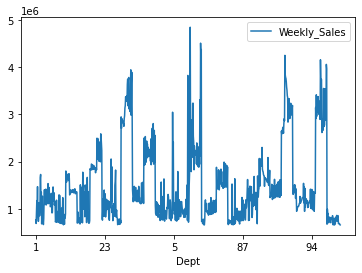

In [ ]:
df6.plot(y='Weekly_Sales', x ='Dept')

In [ ]:
df7 = df[df.Store <= 10]
df7

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
97834,10,98,2012-09-28,22.34,False,B,126512
97835,10,98,2012-10-05,789.38,False,B,126512
97836,10,98,2012-10-12,477.24,False,B,126512
97837,10,98,2012-10-19,578.46,False,B,126512


In [ ]:
df8 = df7.groupby('Dept')['Weekly_Sales'].sum()
df8


Dept
1     2.965052e+07
2     6.837999e+07
3     1.929884e+07
4     4.196238e+07
5     3.785166e+07
          ...     
95    1.052439e+08
96    2.248026e+07
97    2.338198e+07
98    8.280547e+06
99    8.348255e+04
Name: Weekly_Sales, Length: 79, dtype: float64

In [ ]:
df8.argmax()

36

Distribution of sales between product type A and B

In [ ]:
df9 = df7.groupby('Type')['Weekly_Sales'].sum()
df9

Type
A    1.151037e+09
B    5.340676e+08
Name: Weekly_Sales, dtype: float64

In [ ]:
##########################################

In [ ]:
st1 = pd.read_csv("/content/drive/MyDrive/AI_Final_Project/CECS551_dataset_01/store_features/store_01.csv")

Reading th data of the store

In [ ]:
st1.head()

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,2/5/2010,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833
1,1,2/12/2010,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833
2,1,2/19/2010,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833
3,1,2/26/2010,False,60.12,3.555,6129.28,1802.84,NaN,301.48,224.132020,6.833
4,1,3/5/2010,False,61.65,3.630,3552.58,601.32,NaN,2666.22,224.347025,6.833


In [ ]:
st1 = st1.dropna()

Here we clean the data by removing all the rows with missing values

Here we find the correlations

In [ ]:
#C - RELATION BETWEEN CPI AND UNEMPLOYMENT
corr = st1['CPI'].corr(st1['Unemployment'])
corr

-0.8801085299594381

Here we are converting the date time object in pandas to our string format

In [ ]:
st1['Date'] = pd.to_datetime(st1['Date']).astype(str)
st1

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,2010-02-05,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833
1,1,2010-02-12,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833
2,1,2010-02-19,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833
5,1,2010-03-12,False,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833
6,1,2010-03-19,False,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833
...,...,...,...,...,...,...,...,...,...,...,...
160,1,2013-03-01,False,48.01,3.711,10610.74,261.46,2.80,25.54,224.564526,7.441
161,1,2013-03-08,False,50.81,3.658,5000.58,290.46,78.77,606.15,224.708763,7.441
165,1,2013-04-05,False,58.59,3.583,12872.34,5687.86,485.97,478.04,225.086540,7.441
166,1,2013-04-12,False,62.72,3.529,3672.43,932.58,52.86,949.07,225.170160,7.441


In [ ]:
st1.dtypes

Store                      int64
Date                      object
IsHoliday                   bool
Temperature              float64
gas_price                float64
discount_promotional     float64
discount_clearance       float64
discount_damaged_good    float64
discount_competitive     float64
CPI                      float64
Unemployment             float64
dtype: object

In [ ]:
st1.head()

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,2010-02-05,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833
1,1,2010-02-12,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833
2,1,2010-02-19,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833
5,1,2010-03-12,False,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833
6,1,2010-03-19,False,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833


Here we merged data based on the dates in order that we also have the sales information along with store parameters

In [ ]:
df_cd = pd.merge(df7, st1, how='inner', on = 'Date')


In [ ]:
df_cd

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Store_y,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833
1,1,2,2010-02-05,50605.27,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833
2,1,3,2010-02-05,13740.12,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833
3,1,4,2010-02-05,39954.04,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833
4,1,5,2010-02-05,32229.38,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53469,10,94,2012-10-26,795.76,False,B,126512,1,False,69.16,3.506,2585.85,31.75,6.0,1057.16,223.444251,7.931
53470,10,95,2012-10-26,64643.03,False,B,126512,1,False,69.16,3.506,2585.85,31.75,6.0,1057.16,223.444251,7.931
53471,10,96,2012-10-26,13966.23,False,B,126512,1,False,69.16,3.506,2585.85,31.75,6.0,1057.16,223.444251,7.931
53472,10,97,2012-10-26,4785.28,False,B,126512,1,False,69.16,3.506,2585.85,31.75,6.0,1057.16,223.444251,7.931


Here we plot and see the values of correlations between weekly sales, cpi and Unemployment

                   CPI  Unemployment  Weekly_Sales
CPI           1.000000     -0.940631     -0.032243
Unemployment -0.940631      1.000000      0.026021
Weekly_Sales -0.032243      0.026021      1.000000


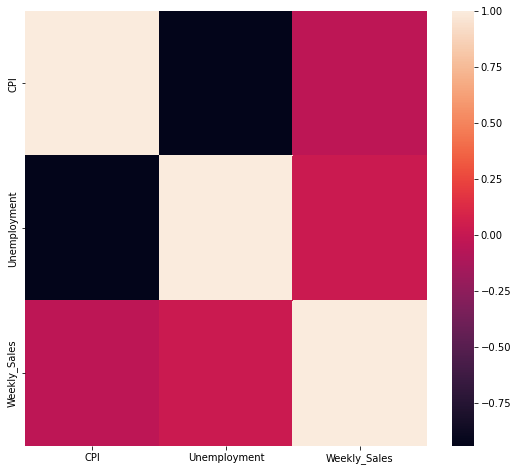

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
df_c = df_cd[['CPI', 'Unemployment','Weekly_Sales']]
corr = df_c.corr()
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)
print(corr)

Here we calculate dales per 1000 size

In [ ]:
df_cd["Performance"] = (df_cd['Weekly_Sales']/df_cd["Size"])*1000

In [ ]:
df_cd

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Store_y,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Performance
0,1,1,2010-02-05,24924.50,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,164.719294
1,1,2,2010-02-05,50605.27,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,334.436573
2,1,3,2010-02-05,13740.12,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,90.804745
3,1,4,2010-02-05,39954.04,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,264.045468
4,1,5,2010-02-05,32229.38,False,A,151315,1,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,212.995275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53469,10,94,2012-10-26,795.76,False,B,126512,1,False,69.16,3.506,2585.85,31.75,6.0,1057.16,223.444251,7.931,6.289996
53470,10,95,2012-10-26,64643.03,False,B,126512,1,False,69.16,3.506,2585.85,31.75,6.0,1057.16,223.444251,7.931,510.963624
53471,10,96,2012-10-26,13966.23,False,B,126512,1,False,69.16,3.506,2585.85,31.75,6.0,1057.16,223.444251,7.931,110.394508
53472,10,97,2012-10-26,4785.28,False,B,126512,1,False,69.16,3.506,2585.85,31.75,6.0,1057.16,223.444251,7.931,37.824712


Then we sort the data from high performance to low

In [ ]:
df_cd = df_cd.sort_values('Performance', ascending=False )
df_rev = df_cd
df_cd

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Store_y,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Performance
27347,10,72,2011-11-25,630999.19,True,B,126512,1,True,60.14,3.236,410.31,98.00,55805.51,8.00,218.467621,8.099,4987.662751
181,3,38,2010-02-05,155897.94,False,B,37392,1,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,4169.285944
11813,3,38,2010-08-06,140753.31,False,B,37392,1,False,86.55,3.417,5683.49,37.20,0.04,2484.22,225.463633,6.334,3764.262677
4355,3,38,2010-04-02,138917.47,False,B,37392,1,False,69.36,3.845,825.10,99.83,1.25,113.25,224.865125,6.833,3715.165543
15886,3,38,2010-11-05,138137.99,False,B,37392,1,False,61.61,3.386,3218.13,420.29,0.55,1498.52,227.005883,6.034,3694.319373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17190,2,47,2010-11-19,-1098.00,False,A,202307,1,False,61.10,3.252,1933.43,197.19,48.60,433.85,227.056924,6.034,-5.427395
11073,2,47,2010-07-30,-1098.00,False,A,202307,1,False,84.94,3.407,3447.28,31.00,2.46,1791.70,225.453758,6.334,-5.427395
52556,7,47,2012-09-28,-389.00,False,B,70713,1,False,76.08,3.666,3666.27,7.64,1.65,1417.96,222.981658,7.931,-5.501110
1439,1,47,2010-02-19,-863.00,False,A,151315,1,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,-5.703334


In [ ]:
df_copy = df_rev
print(df_copy['CPI'].corr(df_copy['Weekly_Sales']))
print(df_copy['Unemployment'].corr(df_copy['Weekly_Sales']))


-0.032243289685472035
0.02602132565801261


In [ ]:

df_cd = df_cd[0:int(df_cd.shape[0]*(30/100))]
df_cd

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Store_y,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Performance
27347,10,72,2011-11-25,630999.19,True,B,126512,1,True,60.14,3.236,410.31,98.00,55805.51,8.00,218.467621,8.099,4987.662751
181,3,38,2010-02-05,155897.94,False,B,37392,1,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,4169.285944
11813,3,38,2010-08-06,140753.31,False,B,37392,1,False,86.55,3.417,5683.49,37.20,0.04,2484.22,225.463633,6.334,3764.262677
4355,3,38,2010-04-02,138917.47,False,B,37392,1,False,69.36,3.845,825.10,99.83,1.25,113.25,224.865125,6.833,3715.165543
15886,3,38,2010-11-05,138137.99,False,B,37392,1,False,61.61,3.386,3218.13,420.29,0.55,1498.52,227.005883,6.034,3694.319373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42443,9,11,2012-06-08,17779.62,False,B,125833,1,False,78.30,3.452,8813.81,116.80,64.55,2652.04,221.749484,8.028,141.295368
40628,2,46,2012-04-20,28583.64,False,A,202307,1,False,66.76,3.877,2230.80,612.02,19.75,275.13,221.564074,8.163,141.288438
16045,5,96,2010-11-05,4927.33,False,B,34875,1,False,61.61,3.386,3218.13,420.29,0.55,1498.52,227.005883,6.034,141.285448
42213,5,74,2012-06-08,4927.10,False,B,34875,1,False,78.30,3.452,8813.81,116.80,64.55,2652.04,221.749484,8.028,141.278853


Here we plot the correlations in top 30% 
The Column or row of Weekly_Sales is the main focus over here

                        Store_x      Dept  Weekly_Sales  IsHoliday_x  \
Store_x                1.000000 -0.119626     -0.082666    -0.000476   
Dept                  -0.119626  1.000000      0.271570     0.001368   
Weekly_Sales          -0.082666  0.271570      1.000000     0.010391   
IsHoliday_x           -0.000476  0.001368      0.010391     1.000000   
Size                  -0.141612  0.182793      0.543215    -0.003151   
Store_y                     NaN       NaN           NaN          NaN   
IsHoliday_y           -0.000476  0.001368      0.010391     1.000000   
Temperature           -0.001226 -0.000668     -0.024901    -0.192629   
gas_price             -0.003884  0.001571     -0.015835    -0.123135   
discount_promotional   0.001452  0.005893      0.002372     0.124952   
discount_clearance    -0.004058  0.003800     -0.014474     0.364758   
discount_damaged_good  0.001646 -0.006055      0.037846     0.376247   
discount_competitive   0.000880  0.005860      0.004081    -0.00

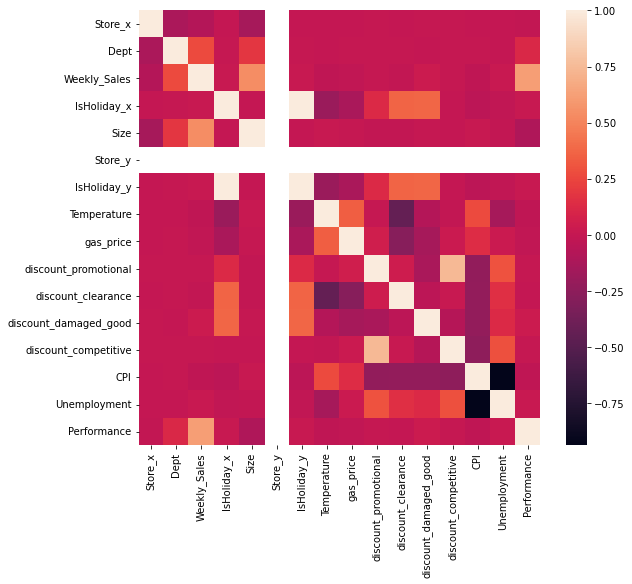

In [ ]:
corr = df_cd.corr()
 
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)
print(corr)


We simultaneously created copies of dataframes

In [ ]:
#Top 30%
df_rev

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Store_y,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Performance
27347,10,72,2011-11-25,630999.19,True,B,126512,1,True,60.14,3.236,410.31,98.00,55805.51,8.00,218.467621,8.099,4987.662751
181,3,38,2010-02-05,155897.94,False,B,37392,1,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,4169.285944
11813,3,38,2010-08-06,140753.31,False,B,37392,1,False,86.55,3.417,5683.49,37.20,0.04,2484.22,225.463633,6.334,3764.262677
4355,3,38,2010-04-02,138917.47,False,B,37392,1,False,69.36,3.845,825.10,99.83,1.25,113.25,224.865125,6.833,3715.165543
15886,3,38,2010-11-05,138137.99,False,B,37392,1,False,61.61,3.386,3218.13,420.29,0.55,1498.52,227.005883,6.034,3694.319373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17190,2,47,2010-11-19,-1098.00,False,A,202307,1,False,61.10,3.252,1933.43,197.19,48.60,433.85,227.056924,6.034,-5.427395
11073,2,47,2010-07-30,-1098.00,False,A,202307,1,False,84.94,3.407,3447.28,31.00,2.46,1791.70,225.453758,6.334,-5.427395
52556,7,47,2012-09-28,-389.00,False,B,70713,1,False,76.08,3.666,3666.27,7.64,1.65,1417.96,222.981658,7.931,-5.501110
1439,1,47,2010-02-19,-863.00,False,A,151315,1,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,-5.703334


Here we are trying to choose the bottom 30%

In [ ]:
df_rev = df_rev.sort_values('Performance' )
df_rev

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Store_y,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Performance
30632,7,47,2011-12-30,-459.00,True,B,70713,1,True,44.55,3.129,5762.10,46011.38,260.36,983.65,219.535990,8.099,-6.491027
1439,1,47,2010-02-19,-863.00,False,A,151315,1,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,-5.703334
52556,7,47,2012-09-28,-389.00,False,B,70713,1,False,76.08,3.666,3666.27,7.64,1.65,1417.96,222.981658,7.931,-5.501110
11073,2,47,2010-07-30,-1098.00,False,A,202307,1,False,84.94,3.407,3447.28,31.00,2.46,1791.70,225.453758,6.334,-5.427395
17190,2,47,2010-11-19,-1098.00,False,A,202307,1,False,61.10,3.252,1933.43,197.19,48.60,433.85,227.056924,6.034,-5.427395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,3,38,2010-11-05,138137.99,False,B,37392,1,False,61.61,3.386,3218.13,420.29,0.55,1498.52,227.005883,6.034,3694.319373
4355,3,38,2010-04-02,138917.47,False,B,37392,1,False,69.36,3.845,825.10,99.83,1.25,113.25,224.865125,6.833,3715.165543
11813,3,38,2010-08-06,140753.31,False,B,37392,1,False,86.55,3.417,5683.49,37.20,0.04,2484.22,225.463633,6.334,3764.262677
181,3,38,2010-02-05,155897.94,False,B,37392,1,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,4169.285944


In [ ]:
df_rev = df_rev[0:int(df_rev.shape[0]*(30/100))]

In [ ]:
#Bottom 30%
df_rev

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Store_y,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Performance
30632,7,47,2011-12-30,-459.00,True,B,70713,1,True,44.55,3.129,5762.10,46011.38,260.36,983.65,219.535990,8.099,-6.491027
1439,1,47,2010-02-19,-863.00,False,A,151315,1,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,-5.703334
52556,7,47,2012-09-28,-389.00,False,B,70713,1,False,76.08,3.666,3666.27,7.64,1.65,1417.96,222.981658,7.931,-5.501110
11073,2,47,2010-07-30,-1098.00,False,A,202307,1,False,84.94,3.407,3447.28,31.00,2.46,1791.70,225.453758,6.334,-5.427395
17190,2,47,2010-11-19,-1098.00,False,A,202307,1,False,61.10,3.252,1933.43,197.19,48.60,433.85,227.056924,6.034,-5.427395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25783,8,21,2011-11-11,4400.39,False,A,155078,1,False,59.11,3.297,10382.90,6115.67,215.07,2406.62,217.998085,8.200,28.375334
52470,6,29,2012-09-28,5746.58,False,A,202505,1,False,76.08,3.666,3666.27,7.64,1.65,1417.96,222.981658,7.931,28.377472
44501,9,33,2012-07-06,3571.22,False,B,125833,1,False,81.57,3.227,12218.76,94.40,192.83,4066.01,221.883779,8.028,28.380631
52659,9,6,2012-09-28,3571.34,False,B,125833,1,False,76.08,3.666,3666.27,7.64,1.65,1417.96,222.981658,7.931,28.381585


                        Store_x      Dept  Weekly_Sales  IsHoliday_x  \
Store_x                1.000000  0.084506     -0.105381    -0.001614   
Dept                   0.084506  1.000000     -0.203478     0.011759   
Weekly_Sales          -0.105381 -0.203478      1.000000     0.004925   
IsHoliday_x           -0.001614  0.011759      0.004925     1.000000   
Size                  -0.139326 -0.136383      0.514915     0.002601   
Store_y                     NaN       NaN           NaN          NaN   
IsHoliday_y           -0.001614  0.011759      0.004925     1.000000   
Temperature            0.001620 -0.001416     -0.021421    -0.155390   
gas_price              0.000235 -0.011638     -0.016296    -0.097308   
discount_promotional   0.002657  0.007111     -0.007404     0.134033   
discount_clearance    -0.006558 -0.002964      0.007083     0.345530   
discount_damaged_good -0.000487  0.025836      0.005659     0.322899   
discount_competitive   0.005688  0.014087     -0.009643     0.00

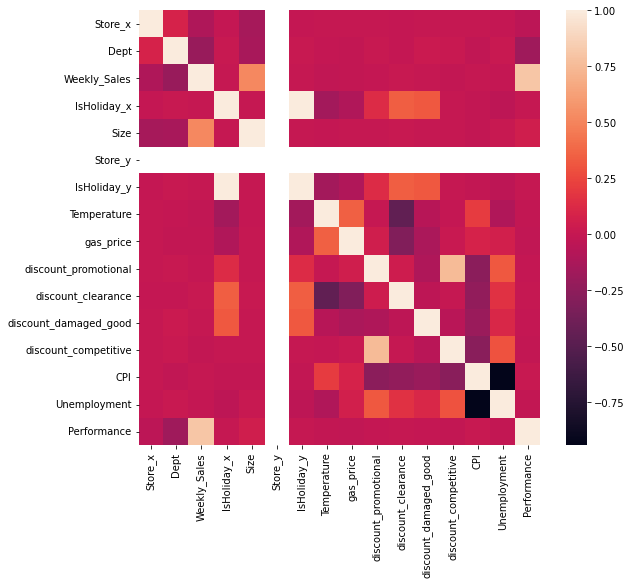

In [ ]:
#Correleration for bottom 30%
corr2 = df_rev.corr()
 
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr2)
print(corr2)

Here we draw heatmaps of product type A and B separately to find which ones are more affected by parametersz 

In [ ]:
df_cd_A = df_cd[df_cd.Type == "A"]
df_cd_B = df_cd[df_cd.Type == "B"]

In [ ]:
df_cd_A

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Store_y,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Performance
26925,4,72,2011-11-25,385051.04,True,A,205863,1,True,60.14,3.236,410.31,98.00,55805.51,8.00,218.467621,8.099,1870.423728
27066,6,72,2011-11-25,326866.60,True,A,202505,1,True,60.14,3.236,410.31,98.00,55805.51,8.00,218.467621,8.099,1614.116195
29683,4,7,2011-12-23,318422.01,False,A,205863,1,False,47.96,3.112,2725.36,40.48,634.70,24.90,219.357722,8.099,1546.766587
26713,1,72,2011-11-25,203670.47,True,A,151315,1,True,60.14,3.236,410.31,98.00,55805.51,8.00,218.467621,8.099,1346.003172
29730,4,72,2011-12-23,271320.74,False,A,205863,1,False,47.96,3.112,2725.36,40.48,634.70,24.90,219.357722,8.099,1317.967483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34113,8,5,2012-02-03,21920.09,False,A,155078,1,False,56.55,3.360,34577.06,3579.21,160.53,32403.87,220.172015,8.099,141.348805
21568,6,79,2011-02-04,28623.50,False,A,202505,1,False,62.81,3.244,2513.52,665.85,30.00,3221.12,227.780136,6.108,141.347127
31085,4,10,2012-01-06,29093.25,False,A,205863,1,False,49.01,3.157,6277.39,21813.16,143.10,1450.13,219.714258,8.099,141.323356
1417,1,23,2010-02-19,21381.85,False,A,151315,1,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,141.306876


In [ ]:
df_cd_B

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Store_y,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Performance
27347,10,72,2011-11-25,630999.19,True,B,126512,1,True,60.14,3.236,410.31,98.00,55805.51,8.00,218.467621,8.099,4987.662751
181,3,38,2010-02-05,155897.94,False,B,37392,1,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,4169.285944
11813,3,38,2010-08-06,140753.31,False,B,37392,1,False,86.55,3.417,5683.49,37.20,0.04,2484.22,225.463633,6.334,3764.262677
4355,3,38,2010-04-02,138917.47,False,B,37392,1,False,69.36,3.845,825.10,99.83,1.25,113.25,224.865125,6.833,3715.165543
15886,3,38,2010-11-05,138137.99,False,B,37392,1,False,61.61,3.386,3218.13,420.29,0.55,1498.52,227.005883,6.034,3694.319373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14531,3,55,2010-09-24,5284.44,False,B,37392,1,False,72.78,3.721,3233.34,1.91,7.69,878.66,226.315150,6.334,141.325417
42443,9,11,2012-06-08,17779.62,False,B,125833,1,False,78.30,3.452,8813.81,116.80,64.55,2652.04,221.749484,8.028,141.295368
16045,5,96,2010-11-05,4927.33,False,B,34875,1,False,61.61,3.386,3218.13,420.29,0.55,1498.52,227.005883,6.034,141.285448
42213,5,74,2012-06-08,4927.10,False,B,34875,1,False,78.30,3.452,8813.81,116.80,64.55,2652.04,221.749484,8.028,141.278853


                        Store_x      Dept  Weekly_Sales  IsHoliday_x  \
Store_x                1.000000 -0.012634     -0.168717    -0.005590   
Dept                  -0.012634  1.000000      0.318510    -0.001672   
Weekly_Sales          -0.168717  0.318510      1.000000     0.010628   
IsHoliday_x           -0.005590 -0.001672      0.010628     1.000000   
Size                   0.083126 -0.040306      0.231228    -0.000502   
Store_y                     NaN       NaN           NaN          NaN   
IsHoliday_y           -0.005590 -0.001672      0.010628     1.000000   
Temperature            0.005833  0.005252     -0.033871    -0.193389   
gas_price             -0.001246  0.010373     -0.018675    -0.121698   
discount_promotional   0.002415  0.007380      0.014922     0.124734   
discount_clearance    -0.007254  0.001792     -0.020633     0.367967   
discount_damaged_good  0.003601 -0.010927      0.043116     0.377320   
discount_competitive   0.001487  0.008077      0.013499    -0.00

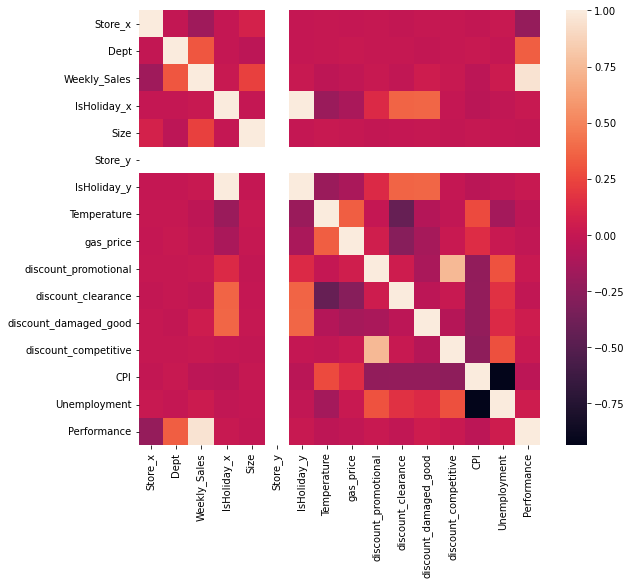

In [ ]:
corr2 = df_cd_A.corr()
 
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr2)
print(corr2)

                        Store_x      Dept  Weekly_Sales  IsHoliday_x  \
Store_x                1.000000  0.005093      0.518600     0.000326   
Dept                   0.005093  1.000000      0.035400     0.006842   
Weekly_Sales           0.518600  0.035400      1.000000     0.015672   
IsHoliday_x            0.000326  0.006842      0.015672     1.000000   
Size                   0.955356 -0.004951      0.538722    -0.000874   
Store_y                     NaN       NaN           NaN          NaN   
IsHoliday_y            0.000326  0.006842      0.015672     1.000000   
Temperature            0.002171 -0.012610     -0.028954    -0.191814   
gas_price             -0.002799 -0.011218     -0.020176    -0.124582   
discount_promotional  -0.005476  0.007463     -0.005956     0.125141   
discount_clearance    -0.008031  0.009088     -0.005559     0.361458   
discount_damaged_good -0.000266 -0.000260      0.040667     0.375157   
discount_competitive  -0.005295  0.006284     -0.000720    -0.00

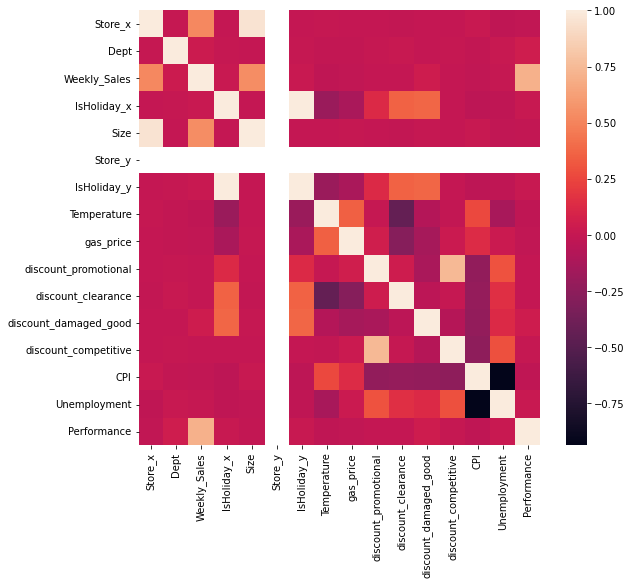

In [ ]:
corr2 = df_cd_B.corr()
 
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr2)
print(corr2)

We can see temprature in both A and B have negetive correlations But B has higher in magnetude negetive correlation with Sales

We can see Gas Price in both A and B have negetive correlations But B has higher in magnetude negetive correlation with Sales

We can see is Holiday in both A and B have Positive correlations and B has higher in magnetude correlation with Sales